In [2]:
import pandas as pd
import os

In [3]:
os.getcwd()

'/Users/xujiayi/Desktop/marlabs udemy/Untitled Folder'

In [4]:
movies = pd.read_csv("P4-Movie-Ratings.csv")

In [5]:
len(movies)

559

In [6]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [7]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [8]:
movies.columns = ['Film', 'Genre', 'CriticRatings', 'AudienceRatings',
       'Budgetmillion', 'Year']

In [9]:
movies.head()

,Film,Genre,CriticRatings,AudienceRatings,Budgetmillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Film             559 non-null    object
 1   Genre            559 non-null    object
 2   CriticRatings    559 non-null    int64 
 3   AudienceRatings  559 non-null    int64 
 4   Budgetmillion    559 non-null    int64 
 5   Year             559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [14]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CriticRatings,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
AudienceRatings,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
Budgetmillion,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0
Year,559.0,2009.152057,1.362632,2007.0,2008.0,2009.0,2010.0,2011.0


In [16]:
movies['Film'] = movies['Film'].astype('category')

In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Film             559 non-null    category
 1   Genre            559 non-null    category
 2   CriticRatings    559 non-null    int64   
 3   AudienceRatings  559 non-null    int64   
 4   Budgetmillion    559 non-null    int64   
 5   Year             559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [19]:
movies['Genre'] = movies['Genre'].astype('category')
movies['Year'] = movies['Year'].astype('category')

In [21]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CriticRatings,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
AudienceRatings,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
Budgetmillion,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0


In [22]:
# working with joint

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

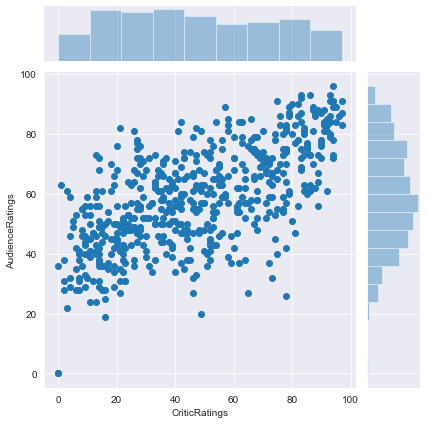

In [37]:
j = sns.jointplot(data = movies, x = 'CriticRatings', y = 'AudienceRatings')

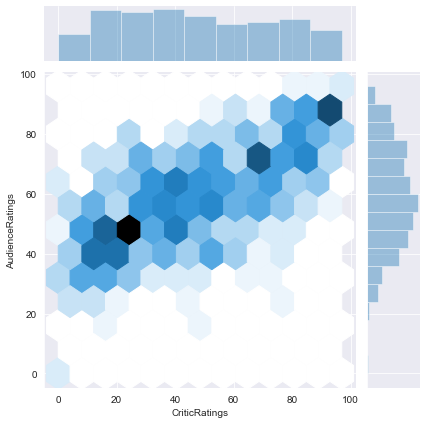

In [36]:
j = sns.jointplot(data = movies, x = 'CriticRatings', y = 'AudienceRatings',kind = "hex")

In [ ]:
# histogram

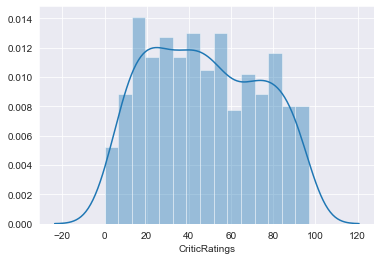

In [35]:
m1 = sns.distplot(movies.CriticRatings, bins = 15)

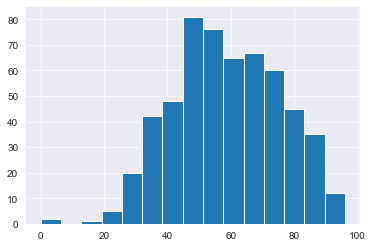

In [91]:
sns.set_style("darkgrid")
n1 = plt.hist(movies.AudienceRatings, bins =15)

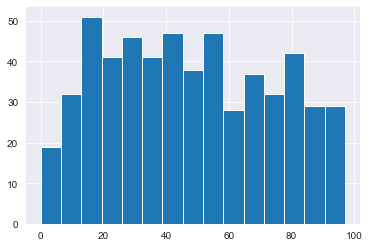

In [38]:
n1 = plt.hist(movies.CriticRatings, bins =15)

In [40]:
# stacked histograms

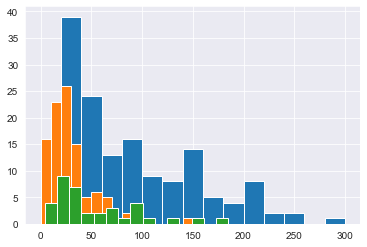

In [53]:

plt.hist(movies[movies.Genre == 'Action'].Budgetmillion,bins =15)
plt.hist(movies[movies.Genre == 'Drama'].Budgetmillion, bins =15)
plt.hist(movies[movies.Genre == 'Thriller'].Budgetmillion,bins= 15)
plt.show()

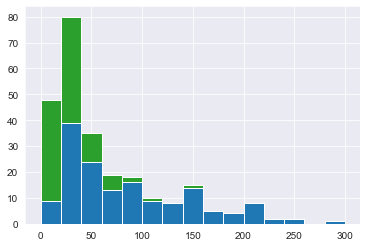

In [62]:
plt.hist([movies[movies.Genre == 'Action'].Budgetmillion,\
          movies[movies.Genre == 'Commedy'].Budgetmillion,
          movies[movies.Genre == 'Drama'].Budgetmillion],\
          stacked = True,bins =15)
plt.show()

In [64]:
for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


In [ ]:
plt.hist([movies[movies.Genre == 'Action'].Budgetmillion,\
          movies[movies.Genre == 'Commedy'].Budgetmillion,
          movies[movies.Genre == 'Drama'].Budgetmillion],\
          stacked = True,bins =15)
plt.show()

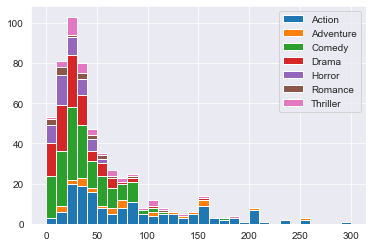

In [74]:
list1 = []
mylabels = []
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].Budgetmillion)
    mylabels.append(gen)

h = plt.hist(list1, bins =30,stacked =True, rwidth =1, label = mylabels )
plt.legend()
plt.show()
#stacked = true

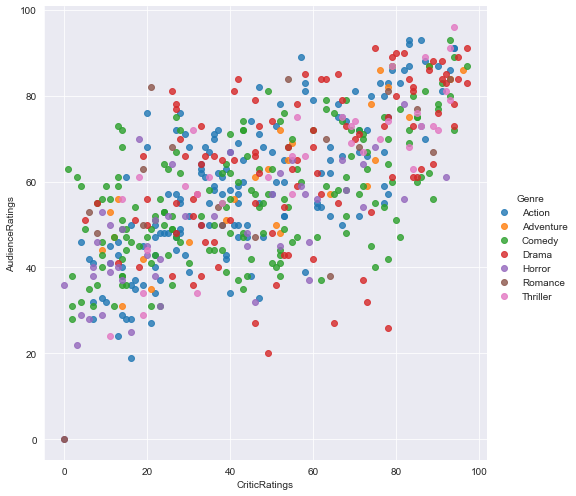

In [82]:
# KDE plot

vis1 = sns.lmplot(data = movies,x = 'CriticRatings', y = 'AudienceRatings',\
                 fit_reg = False, hue ="Genre",
                 size = 7,aspect =1)

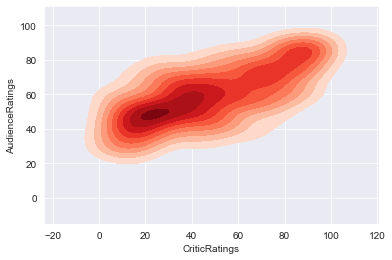

In [86]:
k1 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings,\
                shade = True, shade_lowest = False, cmap = 'Reds')

In [87]:
# working with subplots

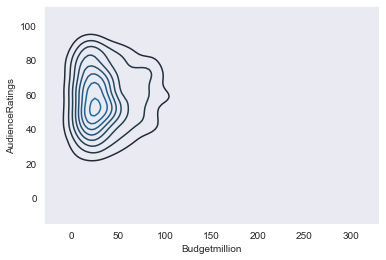

In [90]:

k1 = sns.kdeplot(movies.Budgetmillion, movies.AudienceRatings)

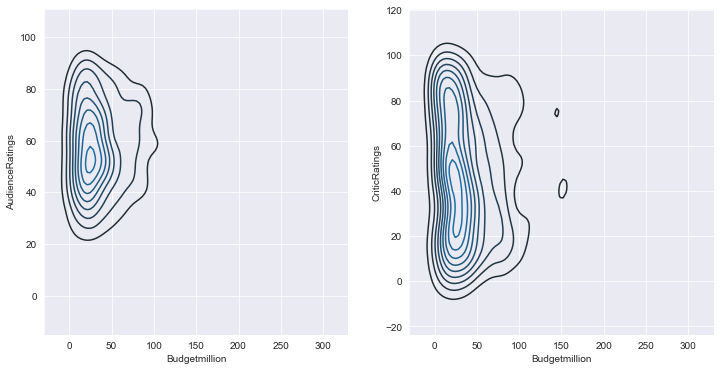

In [99]:
f, axes = plt.subplots(1,2, figsize =(12,6))
k1 = sns.kdeplot(movies.Budgetmillion, movies.AudienceRatings,ax=axes[0])
k1 = sns.kdeplot(movies.Budgetmillion, movies.CriticRatings,ax=axes[1])

[(-20.0, 160.0)]

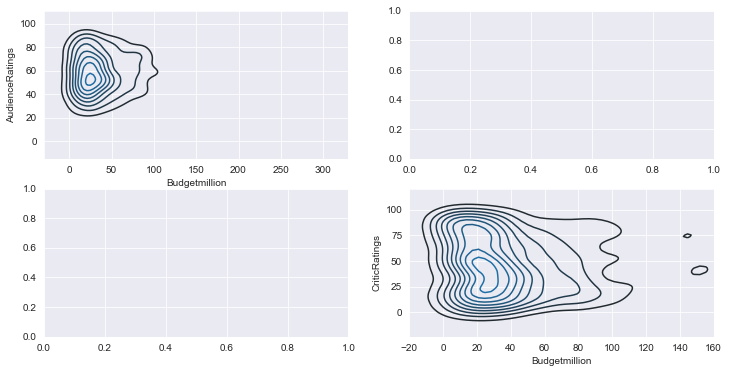

In [104]:
f, axes = plt.subplots(2,2, figsize =(12,6))
k1 = sns.kdeplot(movies.Budgetmillion, movies.AudienceRatings,ax=axes[0,0])
k1 = sns.kdeplot(movies.Budgetmillion, movies.CriticRatings,ax=axes[1,1])
k1.set(xlim = (-20, 160))

In [105]:
#violinplots

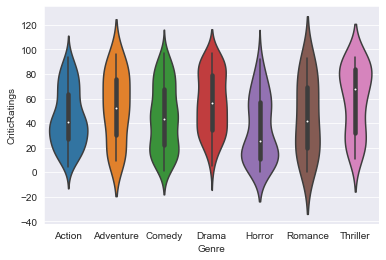

In [106]:
z = sns.violinplot(data= movies, x="Genre", y='CriticRatings')

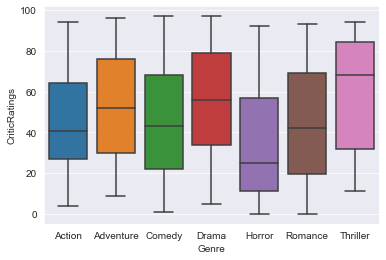

In [107]:
z = sns.boxplot(data= movies, x="Genre", y='CriticRatings')

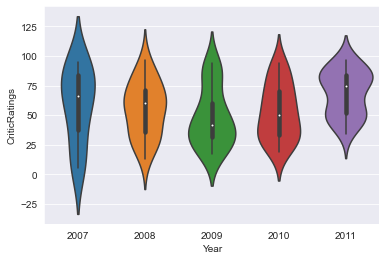

In [108]:
z = sns.violinplot(data= movies[movies.Genre =="Drama"], x="Year", y='CriticRatings')

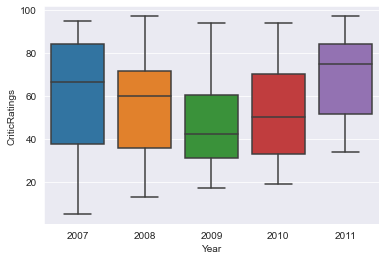

In [109]:
z = sns.boxplot(data= movies[movies.Genre =="Drama"], x="Year", y='CriticRatings')

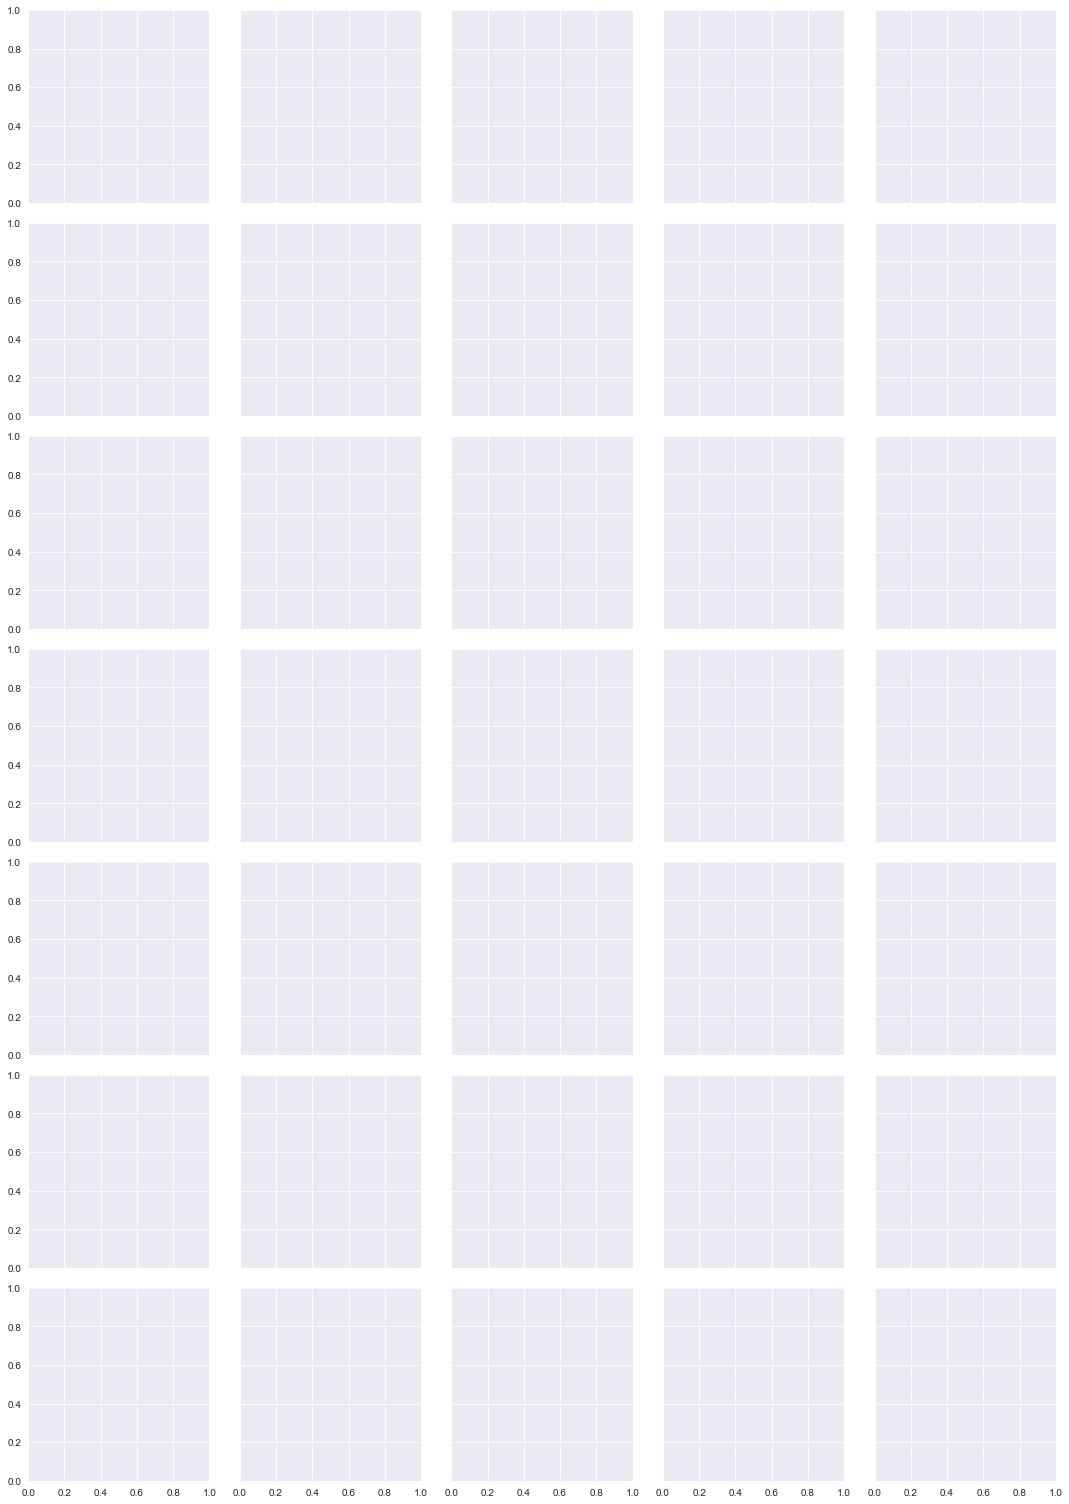

In [112]:
# creating a facet grid
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year',hue='Genre')

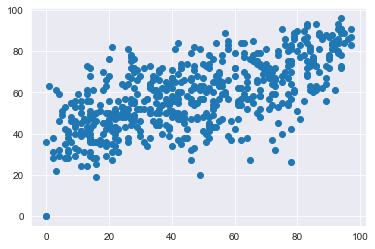

In [114]:

plt.scatter(movies.CriticRatings, movies.AudienceRatings)

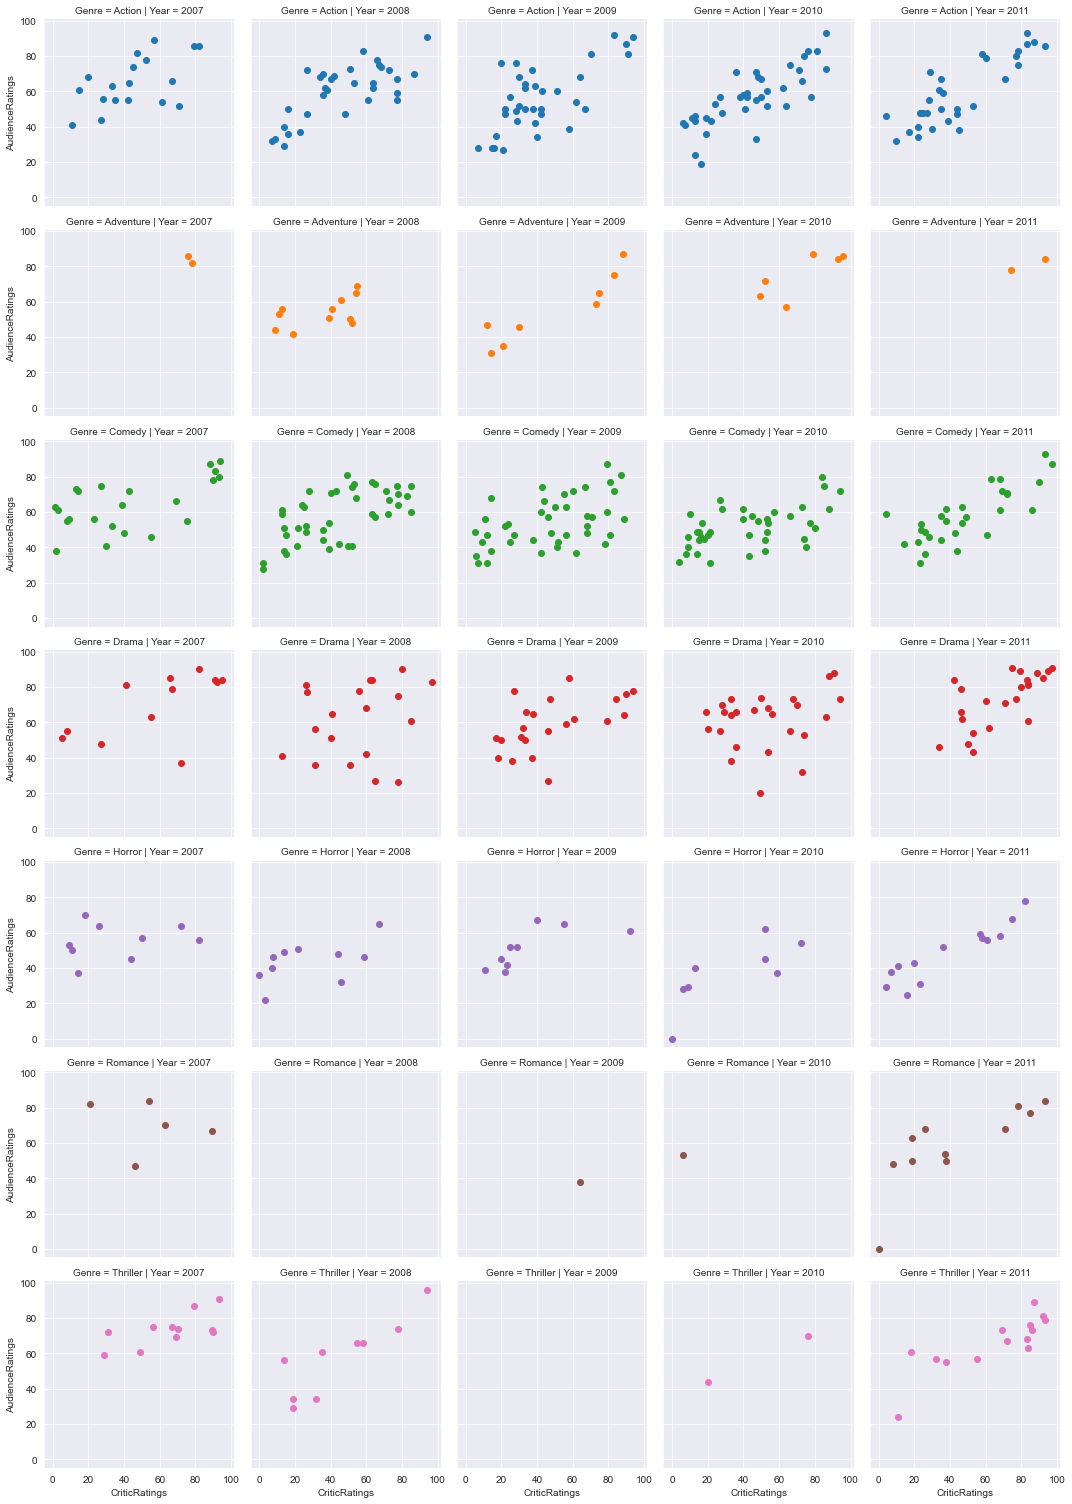

In [118]:
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year',hue='Genre')
g = g.map(plt.scatter,'CriticRatings', 'AudienceRatings')

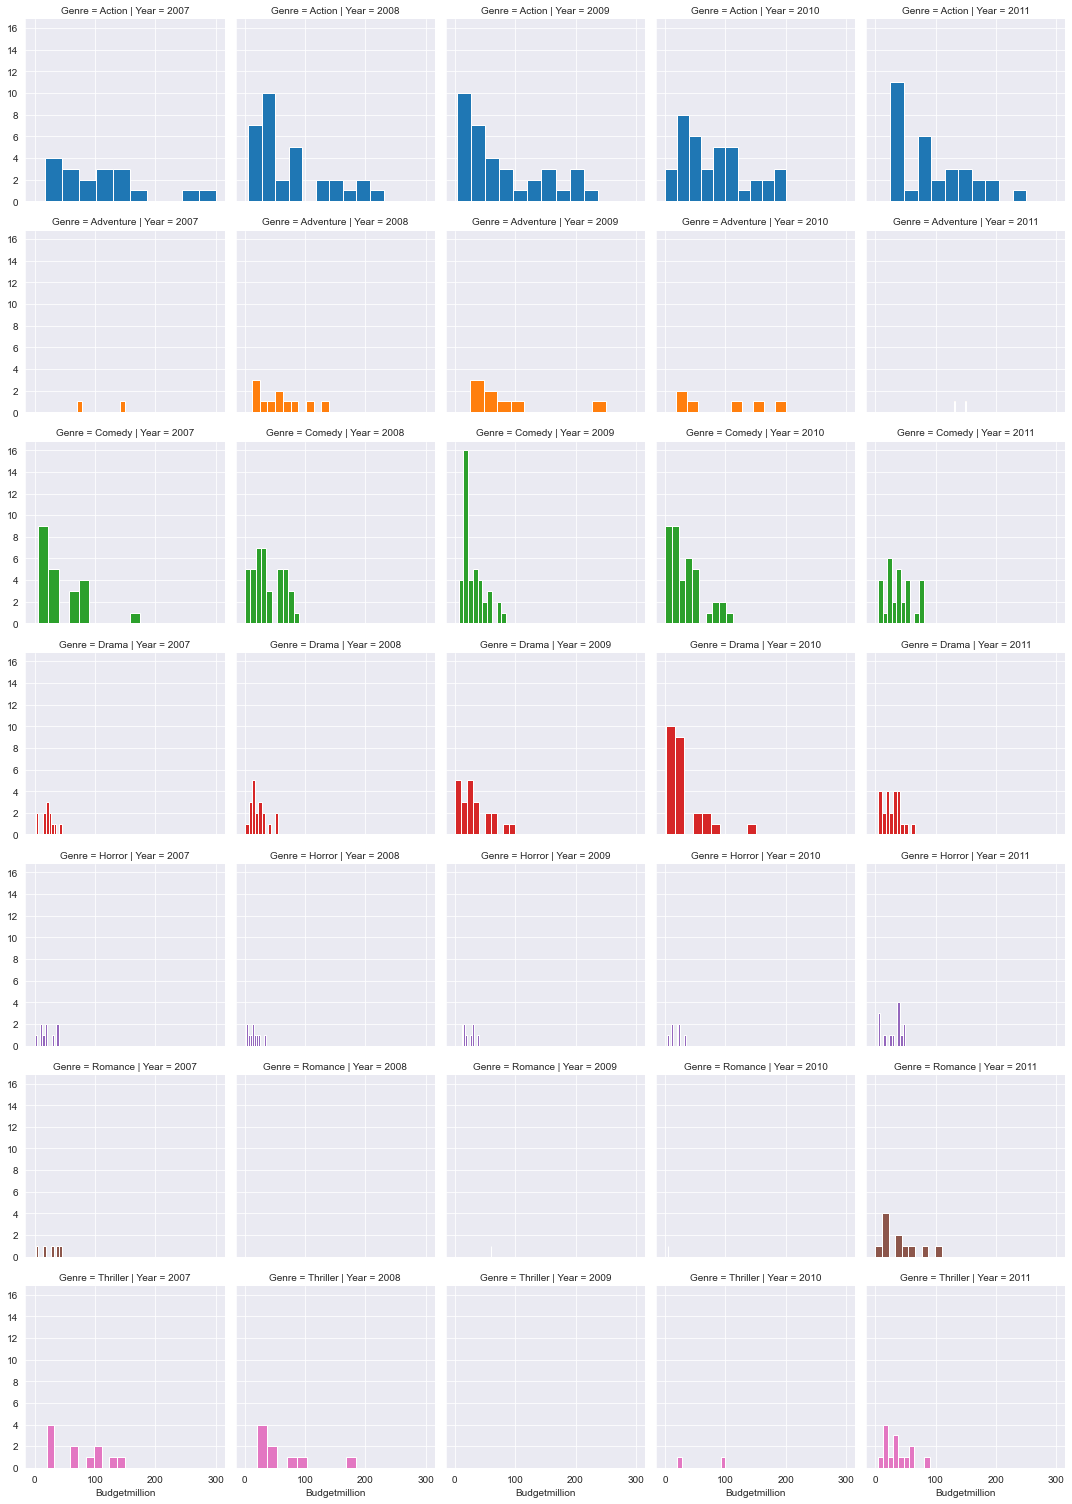

In [119]:
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year',hue='Genre')
g = g.map(plt.hist,'Budgetmillion')

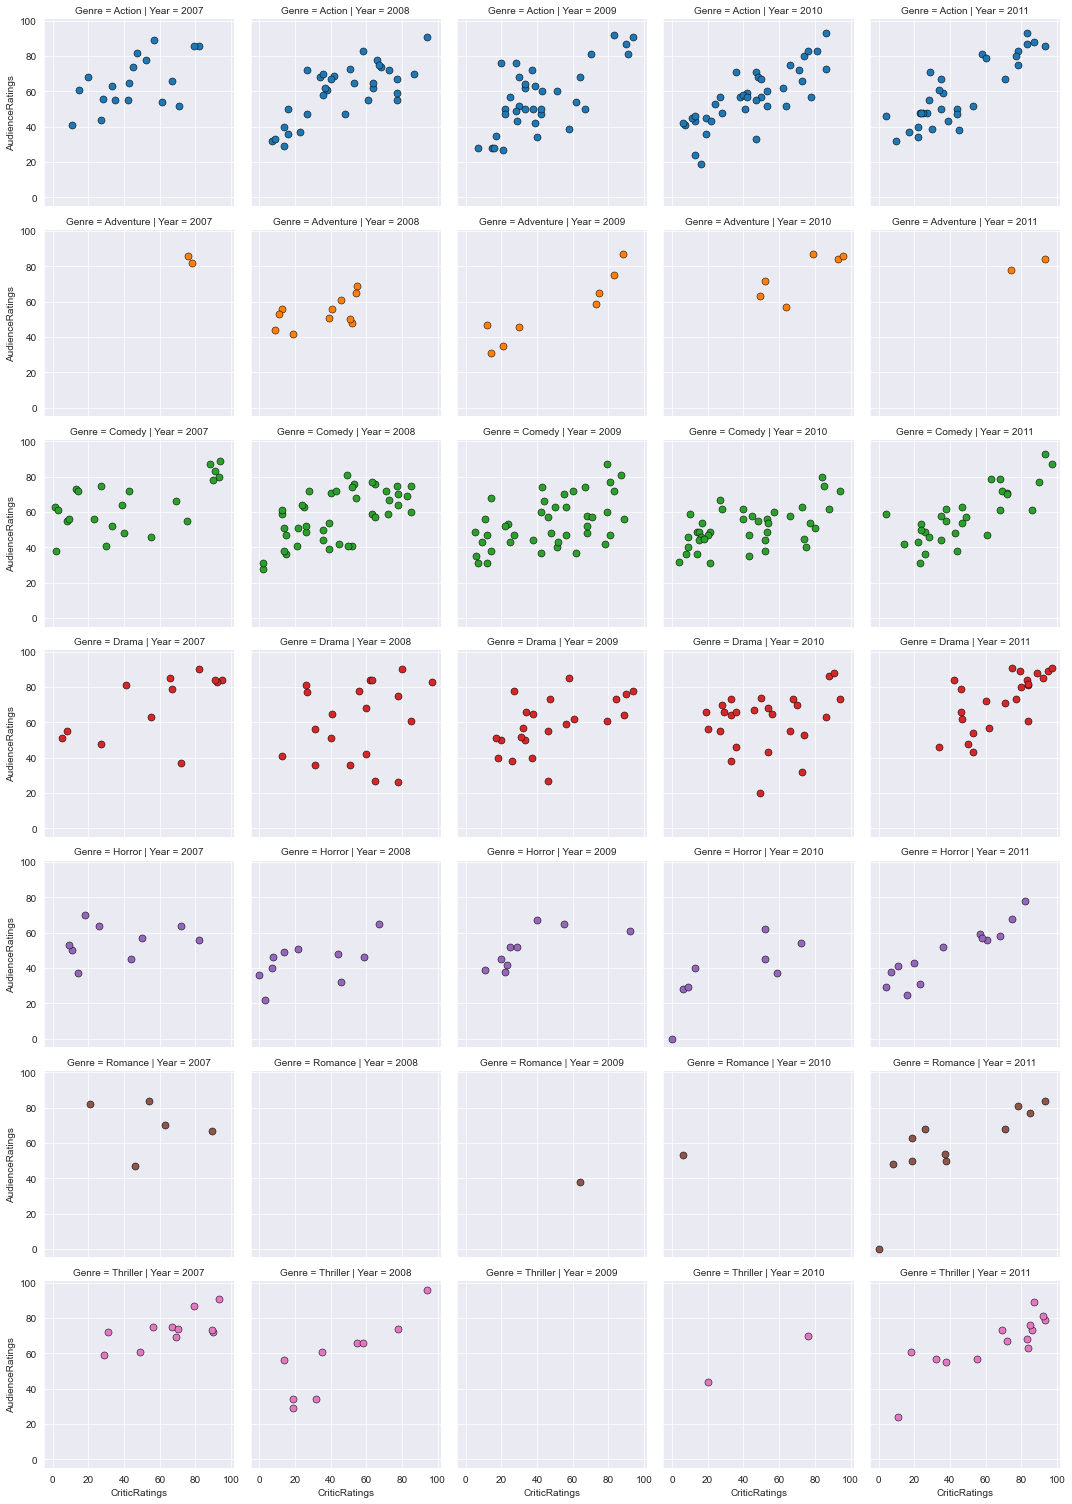

In [121]:
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year',hue='Genre')
kws = dict(s=50, linewidth = 0.5, edgecolor = 'black')
g = g.map(plt.scatter,'CriticRatings', 'AudienceRatings', **kws)

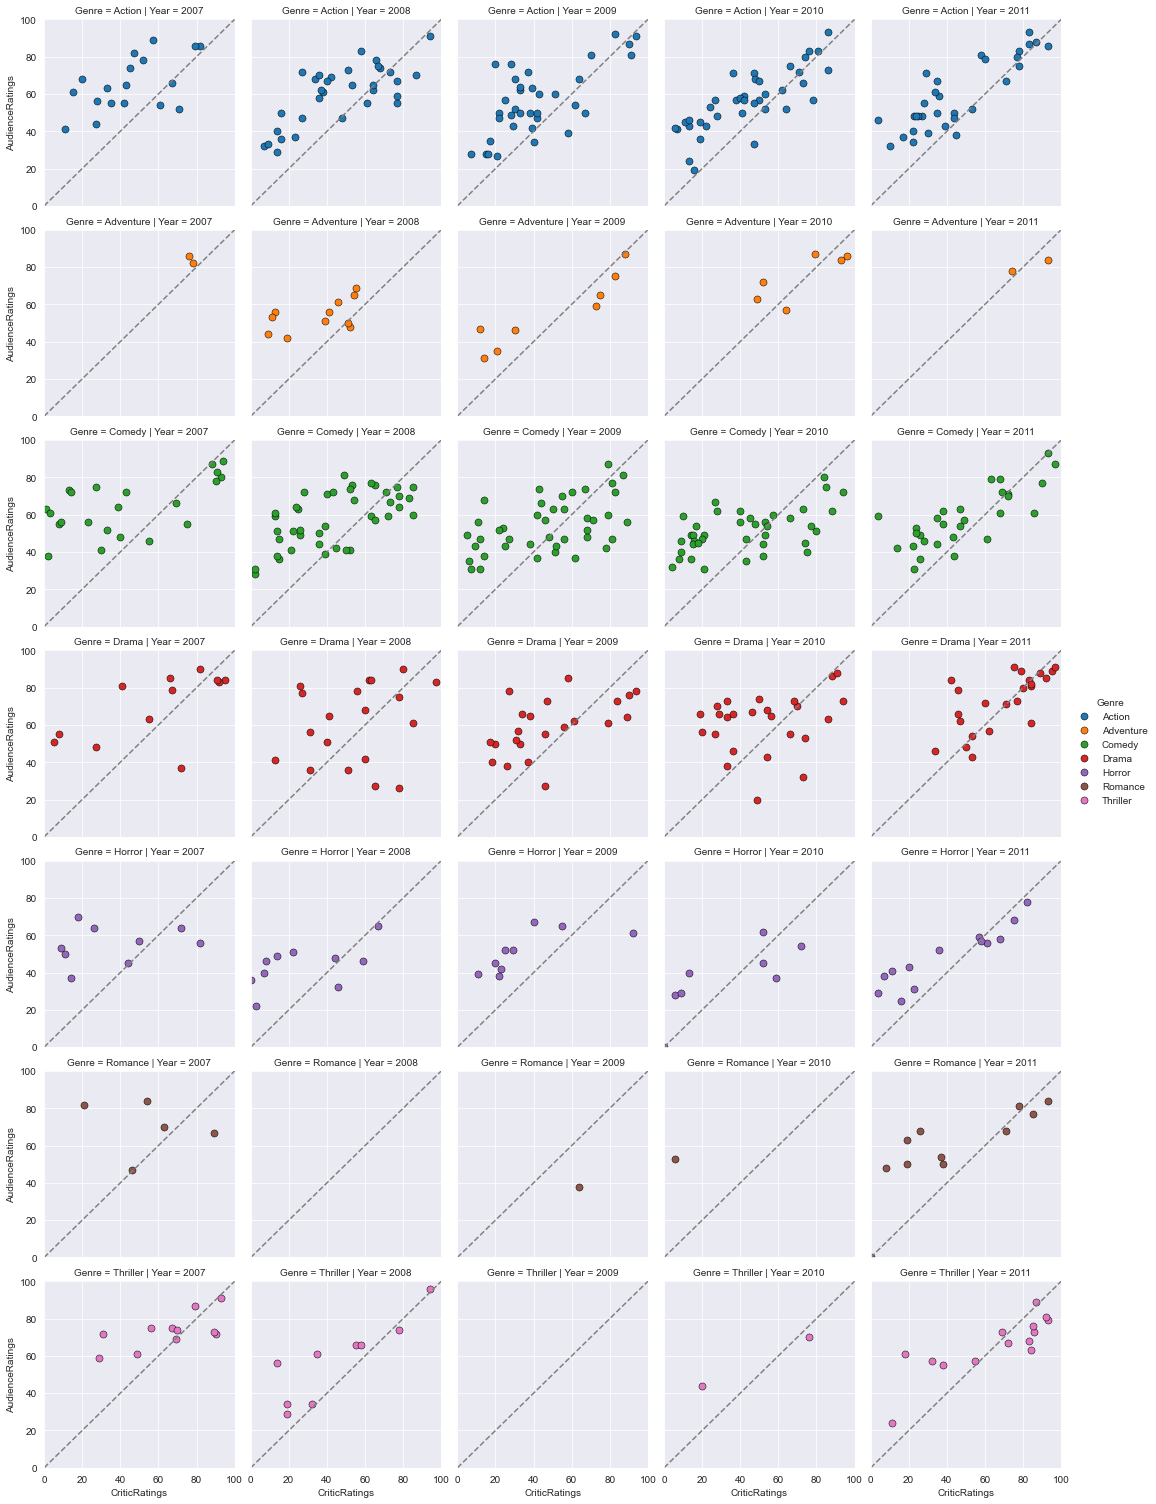

In [126]:
g = sns.FacetGrid(movies, row = 'Genre', col = 'Year',hue='Genre')
kws = dict(s=50, linewidth = 0.5, edgecolor = 'black')
g = g.map(plt.scatter,'CriticRatings', 'AudienceRatings', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0, 100), (0,100), c="gray", ls="--")
g.add_legend()

In [127]:
# building dashboard

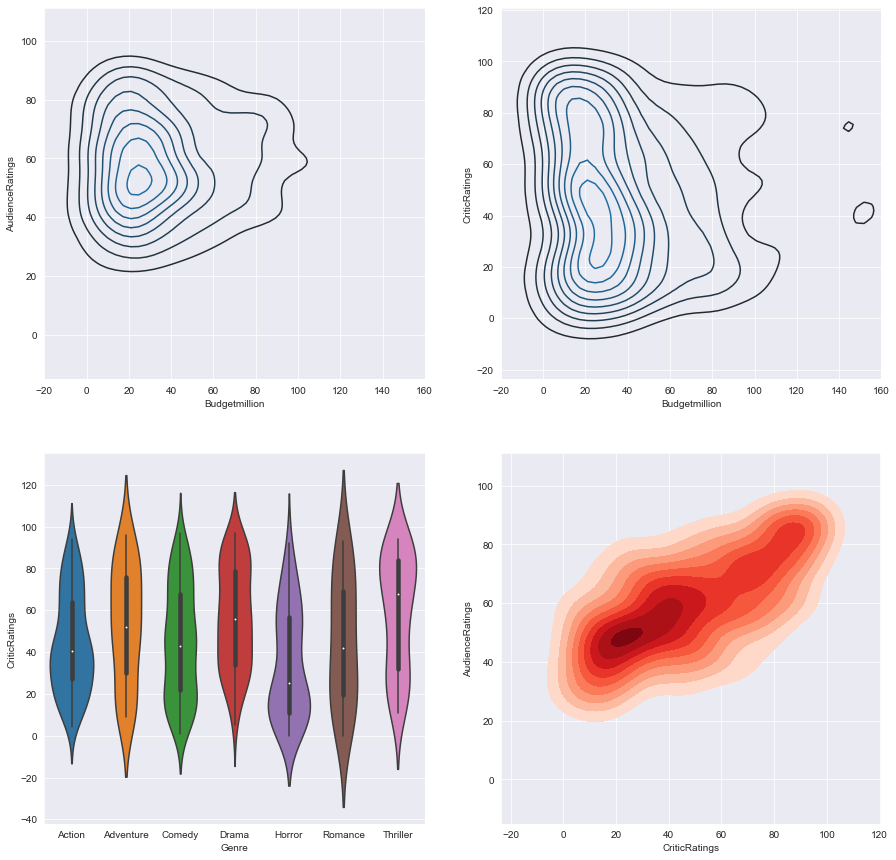

In [131]:
f, axes = plt.subplots(2,2, figsize =(15,15))
k1 = sns.kdeplot(movies.Budgetmillion, movies.AudienceRatings,ax=axes[0,0])
k2 = sns.kdeplot(movies.Budgetmillion, movies.CriticRatings,ax=axes[0,1])
k1.set(xlim =(-20,160))
k2.set(xlim =(-20,160))
z = sns.violinplot(data= movies, x="Genre", y='CriticRatings',ax=axes[1,0])
k4 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings,\
                shade = True, shade_lowest = False, cmap = 'Reds',ax=axes[1,1])

[(-20.0, 160.0)]

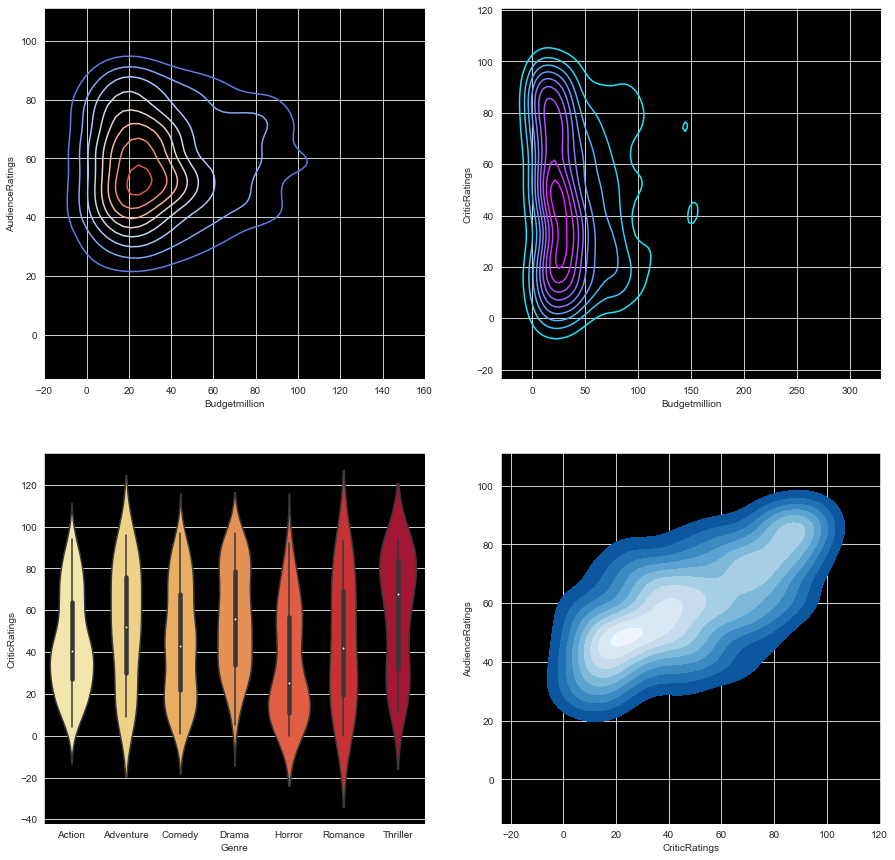

In [140]:
sns.set_style('darkgrid',{"axes.facecolor": "black"})
f, axes = plt.subplots(2,2, figsize =(15,15))
k1 = sns.kdeplot(movies.Budgetmillion, movies.AudienceRatings,\
                  cmap = 'coolwarm',ax=axes[0,0])
k2b = sns.kdeplot(movies.Budgetmillion, movies.CriticRatings,\
                  cmap = 'cool',ax=axes[0,1])

z = sns.violinplot(data= movies, x="Genre", y='CriticRatings',\
                   palette='YlOrRd',ax=axes[1,0])
k4 = sns.kdeplot(movies.CriticRatings, movies.AudienceRatings,\
                shade = True, shade_lowest = False, cmap = 'Blues_r',ax=axes[1,1])

k1.set(xlim =(-20,160))
k2.set(xlim =(-20,160))

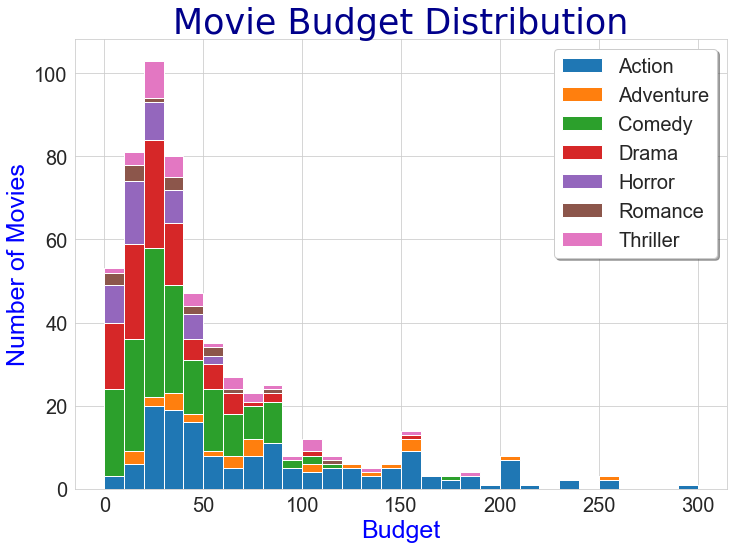

In [150]:
list1 = []
mylabels = []
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].Budgetmillion)
    mylabels.append(gen)

sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) #size of A4
h = plt.hist(list1, bins =30,stacked =True, rwidth =1, label = mylabels )
plt.title("Movie Budget Distribution", fontsize=35, color="Darkblue", fontname="Console")
plt.ylabel("Number of Movies", fontsize = 25, color="blue")
plt.xlabel("Budget", fontsize = 25, color="Blue")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(frameon=True, fancybox=True, shadow=True,\
           prop ={"size":20})
plt.show()
#stacked = true